In [1]:
import pandas as pd
import numpy as np
import xlrd
from copy import deepcopy
import matplotlib.pyplot as plt

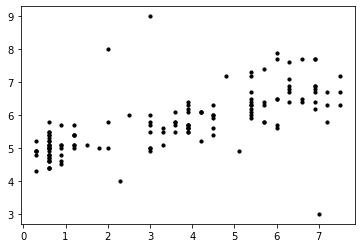

In [2]:
# Import and plot dataset 
workbook = xlrd.open_workbook('PROJECT#1_clusterdata.xls')
sheet = workbook.sheet_by_index(0)

f1 = [sheet.cell_value(i, 0) for i in range(sheet.nrows)]
f2 = [sheet.cell_value(i, 1) for i in range(sheet.nrows)]

X = np.array(list(zip(f1, f2)))
    
plt.scatter(f1,f2,color='black',s=10)

In [2]:
# Euclidean Distance Calcultion
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)   # [[a,b],[c,d]] gives [sqrt(a^2+b^2),sqrt(c^2+d^2)]

# Number of clusters
k = 3

# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

# Plotting along with the Centroids
plt.scatter(f1, f2, color='#050505', s=7)
colmap = {0:'r', 1:'g', 2:'b', 3:'y', 4:'c', 5:'m'}
for i in range(k):
    plt.scatter(C_x,C_y, marker='*', s=200, color=colmap[i])

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

NameError: name 'np' is not defined

In [1]:
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances) # output - 0, 1, 2
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colmap = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colmap[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505'

SyntaxError: unexpected EOF while parsing (<ipython-input-1-d95654aed761>, line 21)